In [1]:
import torch.nn as nn
import pandas as pd
import json
import os
import numpy as np
import pickle
import json
import scipy
from torch.utils.data import Dataset, DataLoader
import torch
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# define random seeds for Neural Networks
torch.manual_seed(0)
np.random.seed(0)

# ignore warnings jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load config file
with open('../utils/configs.json') as f:
    config = json.load(f)

In [34]:
model = 'PW-AE'

In [35]:
# laod outlier scores
outlier_score_path = f'../results/hauge/outlier_scores/{model}'

In [36]:
def base_df(start_date = '2018-01-01', end_date = '2020-03-31'):
    # generate all the dates between start and end date with 5 minutes interval
    dates = pd.date_range(start_date, end_date, freq='5min')
    df = pd.DataFrame(index=dates)
    df.index.name = 'timestamp'
    return df

In [37]:
correlated_results = {}
# for each trajectory, direction and intersection, run AE model
for trajectory in config['trajectories']:
    correlated_results[trajectory] = {}
    for direction in config['trajectories'][trajectory]:
        print(trajectory, direction)
        df = base_df()
        for intersection in config['trajectories'][trajectory][direction]:
            file_path = os.path.join(outlier_score_path,intersection+'_'+direction+'.csv')
            df_intersection = pd.read_csv(file_path) # load outlier scores
            df_intersection['timestamp'] = pd.to_datetime(df_intersection['timestamp']) # convert timestamp to datetime
            df_intersection.set_index('timestamp',inplace=True) # set timestamp as index
            df_intersection = df_intersection.rename(columns={'outlier_score':intersection})
            df = df.merge(df_intersection, on='timestamp', how='inner') # merge outlier scores with base df
        # save the results
        correlated_results[trajectory][direction]= df


T1 North
T1 South
T2 South
T2 North


In [38]:
# save the results as pickle file
with open(f'../results/hauge/outlier_scores/{model}/correlated_results.pickle', 'wb') as f:
    pickle.dump(correlated_results,f)

In [39]:
def plot_heatmap(df, trajectory,direction):
    fig, ax = plt.subplots(facecolor='w')
    sns.heatmap(df.corr())
    plt.title(f"Correlations for {trajectory} {direction}")
    plt.xlabel('Intersection')
    plt.ylabel('Intersection')
    plt.show()
    return

T1 North


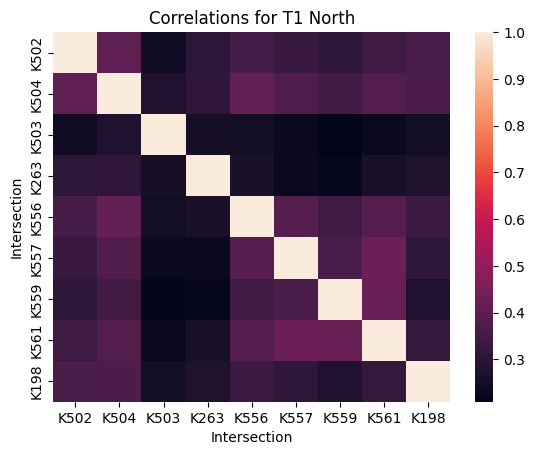

T1 South


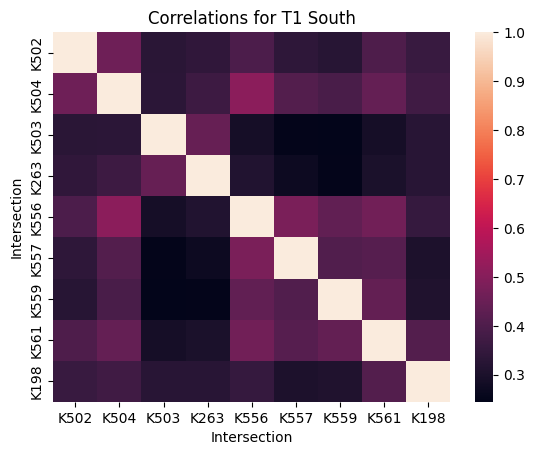

T2 South


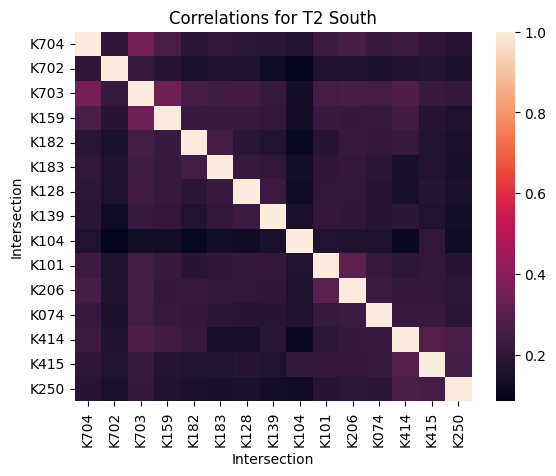

T2 North


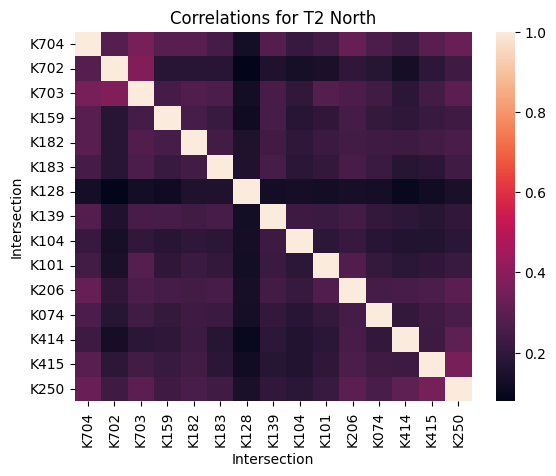

In [40]:
for trajectory in correlated_results.keys():
    for direction in correlated_results[trajectory].keys():
        print(trajectory,direction)
        df = correlated_results[trajectory][direction]
        plot_heatmap(df, trajectory,direction)

In [41]:
# for trajectory in correlated_results.keys():
#     for direction in correlated_results[trajectory].keys():
#         print(trajectory,direction)
#         df = correlated_results[trajectory][direction]
#         plot_heatmap(df, trajectory,direction)

In [42]:
correlated_results['T1']['North'].corr()

,K502,K504,K503,K263,K556,K557,K559,K561,K198
K502,1.000000,0.404231,0.244428,0.303437,0.356314,0.326946,0.306598,0.341978,0.365770
K504,0.404231,1.000000,0.274862,0.309066,0.415961,0.375102,0.348483,0.380660,0.369010
K503,0.244428,0.274862,1.000000,0.256382,0.246711,0.230003,0.209613,0.233407,0.249519
K263,0.303437,0.309066,0.256382,1.000000,0.264852,0.231110,0.220620,0.261050,0.271460
K556,0.356314,0.415961,0.246711,0.264852,1.000000,0.387218,0.344324,0.388373,0.330838
K557,0.326946,0.375102,0.230003,0.231110,0.387218,1.000000,0.366771,0.427606,0.306067
K559,0.306598,0.348483,0.209613,0.220620,0.344324,0.366771,1.000000,0.420784,0.275034
K561,0.341978,0.380660,0.233407,0.261050,0.388373,0.427606,0.420784,1.000000,0.318394
K198,0.365770,0.369010,0.249519,0.271460,0.330838,0.306067,0.275034,0.318394,1.000000


In [43]:
correlated_results['T1']['South'].corr()

,K502,K504,K503,K263,K556,K557,K559,K561,K198
K502,1.000000,0.458665,0.328391,0.341927,0.397018,0.337271,0.324445,0.400956,0.359593
K504,0.458665,1.000000,0.331423,0.366922,0.508701,0.407429,0.391358,0.441472,0.373527
K503,0.328391,0.331423,1.000000,0.445281,0.286382,0.250581,0.244978,0.286314,0.327244
K263,0.341927,0.366922,0.445281,1.000000,0.312039,0.270606,0.249862,0.300494,0.326211
K556,0.397018,0.508701,0.286382,0.312039,1.000000,0.478267,0.436465,0.464997,0.352860
K557,0.337271,0.407429,0.250581,0.270606,0.478267,1.000000,0.405432,0.415891,0.301994
K559,0.324445,0.391358,0.244978,0.249862,0.436465,0.405432,1.000000,0.438332,0.307302
K561,0.400956,0.441472,0.286314,0.300494,0.464997,0.415891,0.438332,1.000000,0.408932
K198,0.359593,0.373527,0.327244,0.326211,0.352860,0.301994,0.307302,0.408932,1.000000


In [44]:
correlated_results['T2']['North'].corr()

,K704,K702,K703,K159,K182,K183,K128,K139,K104,K101,K206,K074,K414,K415,K250
K704,1.000000,0.282568,0.357036,0.291213,0.290259,0.244677,0.128042,0.276952,0.214601,0.243819,0.320865,0.262736,0.226889,0.289824,0.328612
K702,0.282568,1.000000,0.379644,0.178576,0.175836,0.176232,0.078556,0.156884,0.134975,0.141908,0.194902,0.173394,0.129032,0.188036,0.230435
K703,0.357036,0.379644,1.000000,0.245768,0.271227,0.258915,0.122794,0.252365,0.199566,0.281638,0.263959,0.236434,0.186214,0.243051,0.298874
K159,0.291213,0.178576,0.245768,1.000000,0.250807,0.215895,0.117526,0.249669,0.176943,0.195305,0.247449,0.206477,0.192063,0.218919,0.232895
K182,0.290259,0.175836,0.271227,0.250807,1.000000,0.242459,0.153409,0.239682,0.192585,0.221547,0.243743,0.230991,0.224687,0.243755,0.255105
K183,0.244677,0.176232,0.258915,0.215895,0.242459,1.000000,0.157526,0.248277,0.183493,0.202164,0.251956,0.222333,0.173342,0.184890,0.234751
K128,0.128042,0.078556,0.122794,0.117526,0.153409,0.157526,1.000000,0.122741,0.129484,0.125186,0.132950,0.132207,0.096981,0.118279,0.139845
K139,0.276952,0.156884,0.252365,0.249669,0.239682,0.248277,0.122741,1.000000,0.222542,0.221593,0.243514,0.203520,0.187673,0.174761,0.200296
K104,0.214601,0.134975,0.199566,0.176943,0.192585,0.183493,0.129484,0.222542,1.000000,0.187034,0.212785,0.175826,0.162479,0.164386,0.181224
K101,0.243819,0.141908,0.281638,0.195305,0.221547,0.202164,0.125186,0.221593,0.187034,1.000000,0.269969,0.207485,0.181272,0.195492,0.216021


In [45]:
correlated_results['T2']['South'].corr()

,K704,K702,K703,K159,K182,K183,K128,K139,K104,K101,K206,K074,K414,K415,K250
K704,1.000000,0.201056,0.356310,0.263721,0.186423,0.205943,0.192597,0.186246,0.164871,0.229409,0.255564,0.213669,0.228218,0.201675,0.183935
K702,0.201056,1.000000,0.213923,0.182623,0.146331,0.159678,0.154072,0.118255,0.084420,0.153027,0.159916,0.150725,0.160198,0.167119,0.147480
K703,0.356310,0.213923,1.000000,0.343002,0.252601,0.241442,0.245108,0.216742,0.133700,0.246527,0.252707,0.247237,0.270952,0.223070,0.210479
K159,0.263721,0.182623,0.343002,1.000000,0.222864,0.220234,0.214727,0.208746,0.130213,0.221316,0.212068,0.213195,0.242451,0.175325,0.160734
K182,0.186423,0.146331,0.252601,0.222864,1.000000,0.247772,0.189695,0.168898,0.104740,0.184443,0.217728,0.207974,0.219400,0.169808,0.146172
K183,0.205943,0.159678,0.241442,0.220234,0.247772,1.000000,0.223767,0.205093,0.130956,0.201794,0.208423,0.186377,0.144063,0.165837,0.142234
K128,0.192597,0.154072,0.245108,0.214727,0.189695,0.223767,1.000000,0.230552,0.126583,0.204655,0.205002,0.181378,0.138314,0.180409,0.149176
K139,0.186246,0.118255,0.216742,0.208746,0.168898,0.205093,0.230552,1.000000,0.148199,0.206667,0.199545,0.179469,0.187312,0.166277,0.130288
K104,0.164871,0.084420,0.133700,0.130213,0.104740,0.130956,0.126583,0.148199,1.000000,0.164461,0.156431,0.160407,0.108632,0.204499,0.126129
K101,0.229409,0.153027,0.246527,0.221316,0.184443,0.201794,0.204655,0.206667,0.164461,1.000000,0.309011,0.214634,0.194336,0.207299,0.181043
